In [1]:
from stat import FILE_ATTRIBUTE_SPARSE_FILE


#pip install FILE_ATTRIBUTE_SPARSE_FILE

In [2]:
import pandas as pd
activities_df = pd.read_csv('data/strava_activities.csv')

# Count the number of activities for each Activity Type
activity_counts = activities_df['Activity Type'].value_counts()
activity_counts

Activity Type
Run                1553
Ride                487
Swim                223
Virtual Ride         46
Weight Training      31
Workout               8
Walk                  3
Name: count, dtype: int64

In [3]:
# Filter activities for the 'Run' activity type
run_activities_df = activities_df[activities_df['Activity Type'] == 'Run']

# Display the first few rows of the run activities DataFrame
print(run_activities_df.head())


   Activity ID          Activity Date Activity Name Activity Type  \
0    477882782   1 Jan 2016, 21:21:39   Morning Run           Run   
1    477882787  17 Jan 2016, 22:05:40   Morning Run           Run   
2    477882788  18 Jan 2016, 22:18:36   Morning Run           Run   
3    477882789  16 Jan 2016, 21:10:39   Morning Run           Run   
4    477882792  19 Jan 2016, 23:02:41   Morning Run           Run   

  Activity Description  Elapsed Time Distance  Max Heart Rate  \
0                  NaN          6948    21.15             NaN   
1                  NaN          2680     8.09             NaN   
2                  NaN          2657     8.17             NaN   
3                  NaN          5401    16.43             NaN   
4                  NaN          2587     8.11             NaN   

   Relative Effort  Commute  ... Total Grit Average Flow Flagged  \
0              NaN    False  ...        NaN          NaN     NaN   
1              NaN    False  ...        NaN          NaN  

In [4]:
# Filter activities for the 'Run' activity type
run_activities_df = activities_df[activities_df['Activity Type'] == 'Run']

# Print dimensions of running data before removing null values
print("Dimensions of running data before removing null values:", run_activities_df.shape)


Dimensions of running data before removing null values: (1553, 87)


In [5]:
# Check for null values in each column
null_counts = run_activities_df.isnull().sum()

# Display the count of null values in each column
print(null_counts)


Activity ID                        0
Activity Date                      0
Activity Name                      0
Activity Type                      0
Activity Description            1544
                                ... 
Newly Explored Distance         1553
Newly Explored Dirt Distance    1553
Activity Count                  1553
Total Steps                     1544
Media                           1553
Length: 87, dtype: int64


In [6]:

# Remove columns with more than 1500 null values
activities_df_filtered = run_activities_df.dropna(thresh=len(activities_df) - 1500, axis=1)

# Display the new DataFrame
print(activities_df_filtered)


      Activity ID          Activity Date  \
0       477882782   1 Jan 2016, 21:21:39   
1       477882787  17 Jan 2016, 22:05:40   
2       477882788  18 Jan 2016, 22:18:36   
3       477882789  16 Jan 2016, 21:10:39   
4       477882792  19 Jan 2016, 23:02:41   
...           ...                    ...   
2341  10123458734  25 Jun 2023, 01:02:41   
2344  10123465749  27 Jun 2023, 04:34:42   
2347  10123472446  29 Jun 2023, 05:05:11   
2348  10123474604  30 Jun 2023, 06:04:06   
2350  10271579059  19 Nov 2023, 00:21:15   

                                          Activity Name Activity Type  \
0                                           Morning Run           Run   
1                                           Morning Run           Run   
2                                           Morning Run           Run   
3                                           Morning Run           Run   
4                                           Morning Run           Run   
...                              

In [7]:
# Check for null values in the filtered DataFrame
null_counts_filtered = activities_df_filtered.isnull().sum()

# Display the count of null values in each column
print(null_counts_filtered)


Activity ID             0
Activity Date           0
Activity Name           0
Activity Type           0
Elapsed Time            0
Distance                0
Max Heart Rate        508
Relative Effort       508
Commute                 0
Filename                3
Athlete Weight        525
Elapsed Time.1         17
Moving Time             0
Distance.1              0
Max Speed               3
Elevation Gain          9
Elevation Low         295
Elevation High        295
Max Grade               3
Average Grade           0
Max Cadence           364
Average Cadence       359
Average Heart Rate    508
Calories              260
Relative Effort.1     508
Commute.1              22
dtype: int64


In [8]:
# Remove null values from the filtered DataFrame
cleaned_running_data = activities_df_filtered.dropna()

# Display the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", cleaned_running_data.shape)


Shape of cleaned DataFrame: (475, 26)


In [9]:
# Print data types of all columns
print(cleaned_running_data.dtypes)


Activity ID             int64
Activity Date          object
Activity Name          object
Activity Type          object
Elapsed Time            int64
Distance               object
Max Heart Rate        float64
Relative Effort       float64
Commute                  bool
Filename               object
Athlete Weight        float64
Elapsed Time.1        float64
Moving Time           float64
Distance.1            float64
Max Speed             float64
Elevation Gain        float64
Elevation Low         float64
Elevation High        float64
Max Grade             float64
Average Grade         float64
Max Cadence           float64
Average Cadence       float64
Average Heart Rate    float64
Calories              float64
Relative Effort.1     float64
Commute.1             float64
dtype: object


In [10]:
# Specify the file path where you want to save the cleaned data
file_path = "C:/Users/himan/OneDrive/Documents/RedbackOperations/redback-fit-sports-performance/Cycling Analysis/data/datacleaned_running_data.csv"

# Save the DataFrame to a CSV file
cleaned_running_data.to_csv(file_path, index=False)


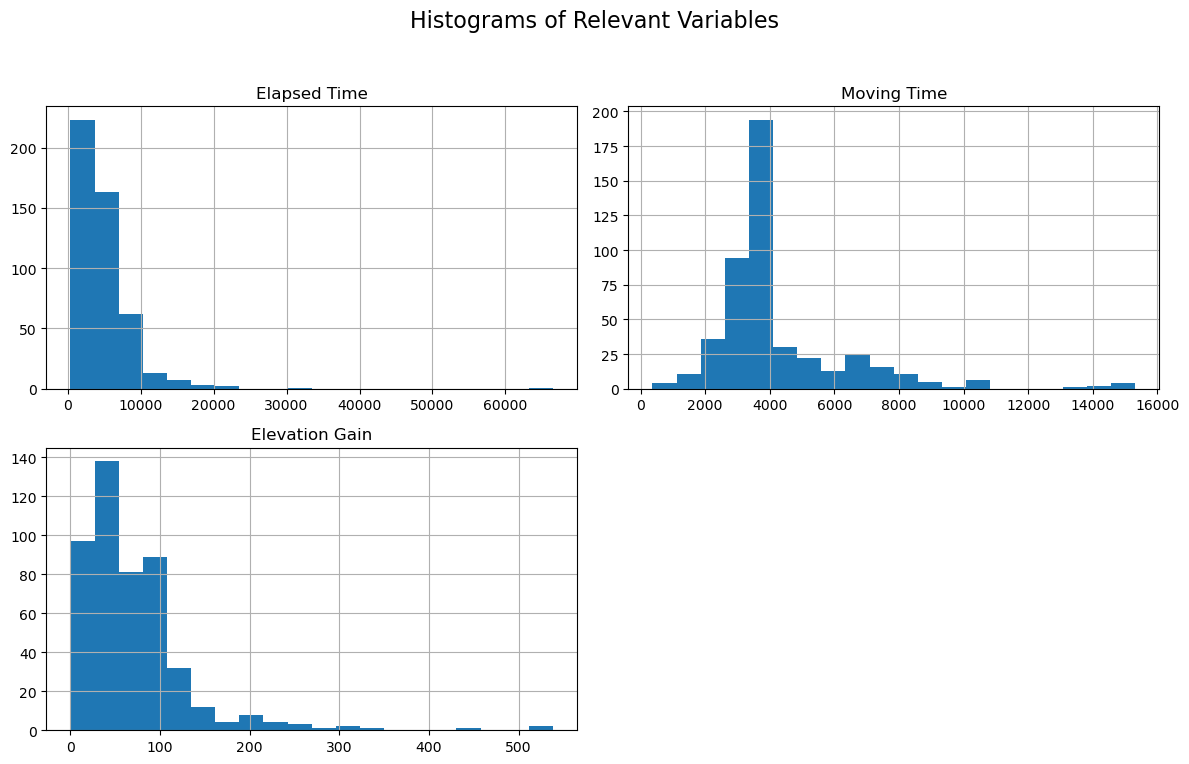

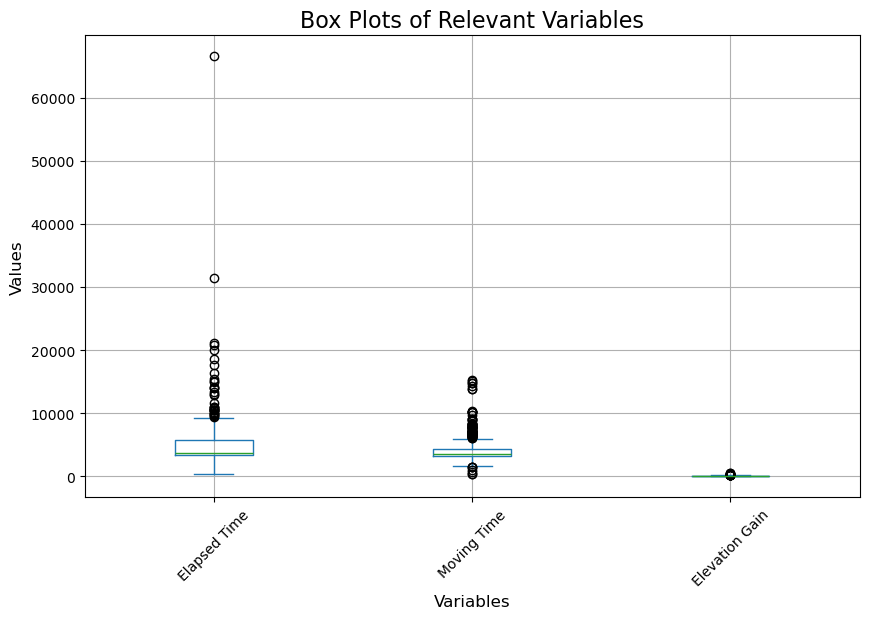

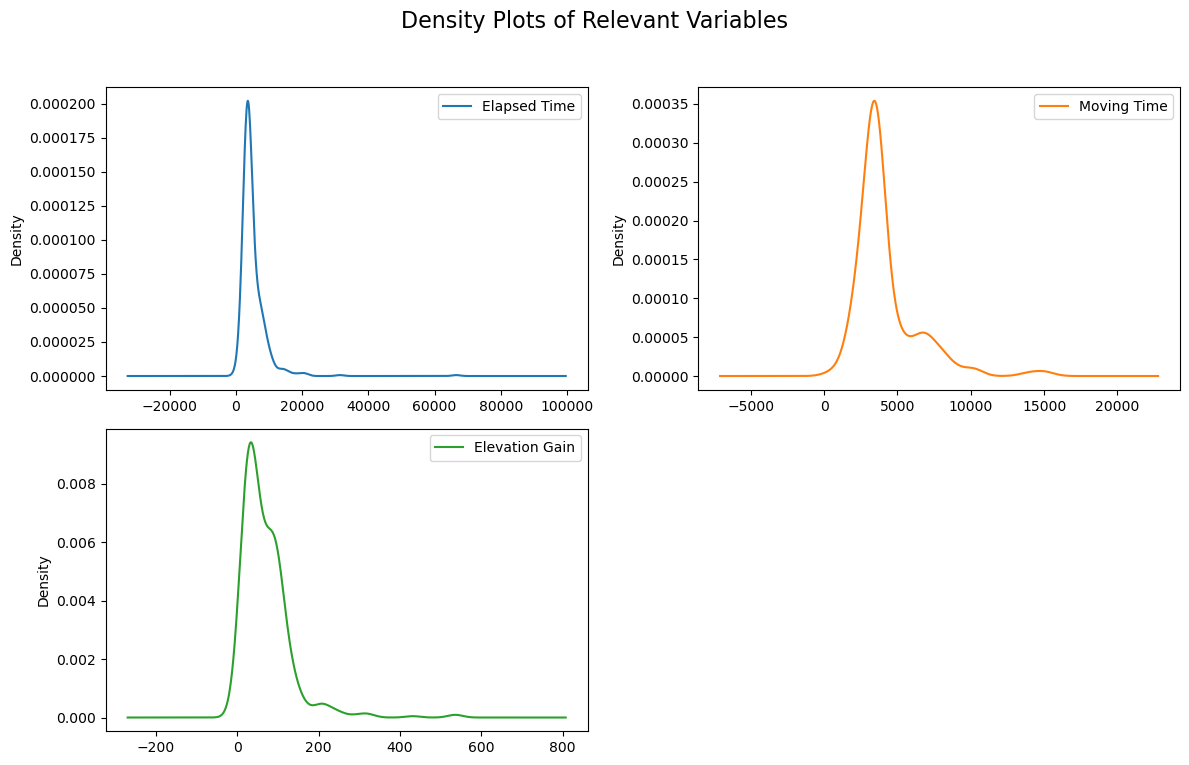

Descriptive Statistics for Relevant Variables:
       Elapsed Time   Moving Time  Elevation Gain
count    475.000000    475.000000      475.000000
mean    5065.694737   4179.875789       69.987681
std     4242.816965   2159.041692       61.931859
min      369.000000    368.000000        0.000000
25%     3412.500000   3199.000000       29.445753
50%     3742.000000   3520.000000       55.109558
75%     5769.500000   4321.500000       95.626850
max    66516.000000  15303.000000      538.196533


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame


# Select relevant variables
relevant_variables = ['Elapsed Time', 'Distance', 'Moving Time', 'Elevation Gain']

# Compute descriptive statistics
descriptive_stats = cleaned_running_data[relevant_variables].describe()

# Visualize distributions using histograms
cleaned_running_data[relevant_variables].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Relevant Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlap
plt.show()

# Visualize distributions using box plots
cleaned_running_data[relevant_variables].plot(kind='box', figsize=(10, 6))
plt.title('Box Plots of Relevant Variables', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Variables', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Visualize distributions using density plots
cleaned_running_data[relevant_variables].plot(kind='density', subplots=True, layout=(2, 2), sharex=False, figsize=(12, 8))
plt.suptitle('Density Plots of Relevant Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid overlap
plt.show()

# Print descriptive statistics
print("Descriptive Statistics for Relevant Variables:")
print(descriptive_stats)


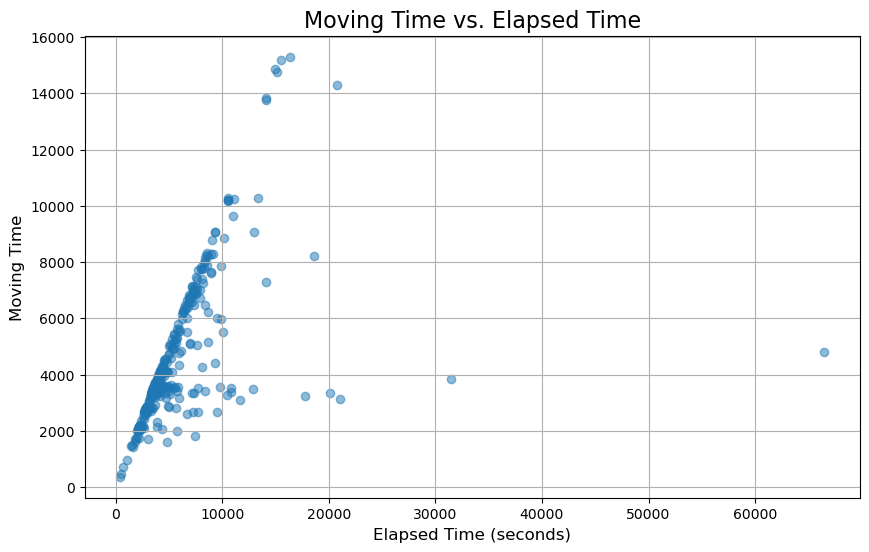

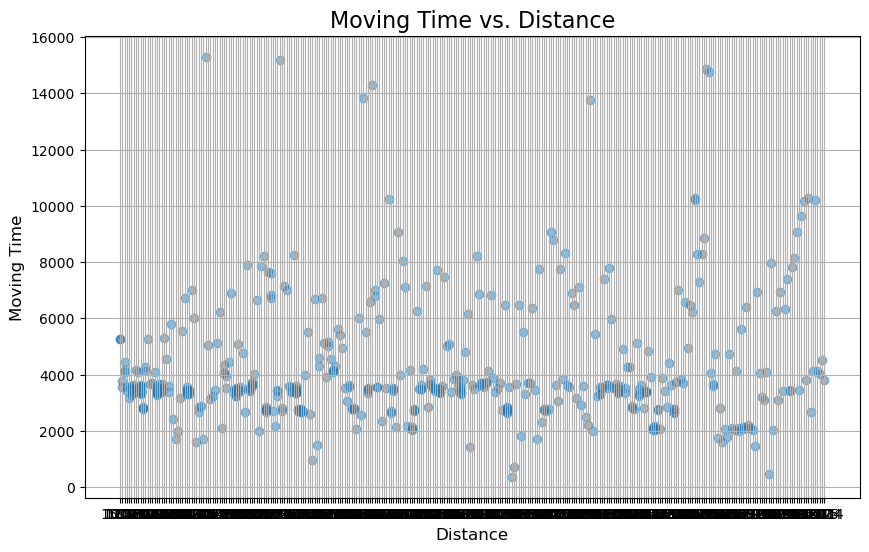

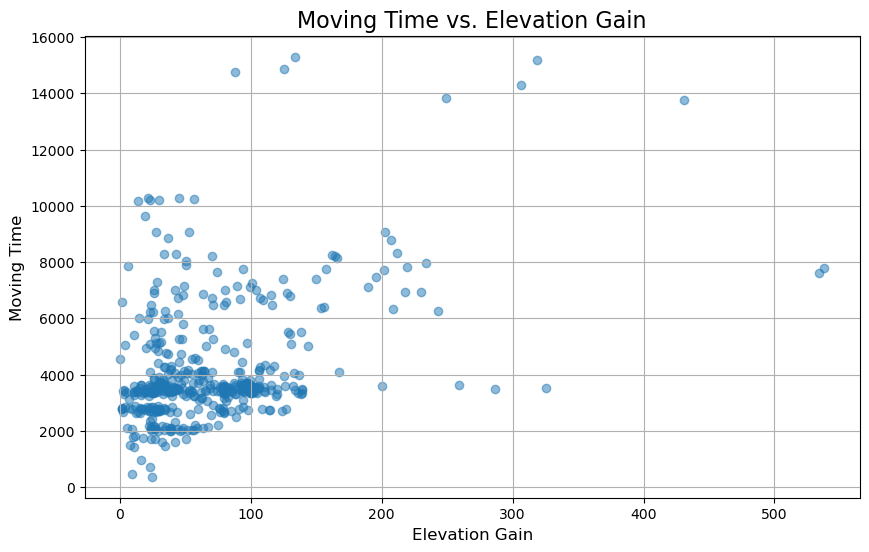

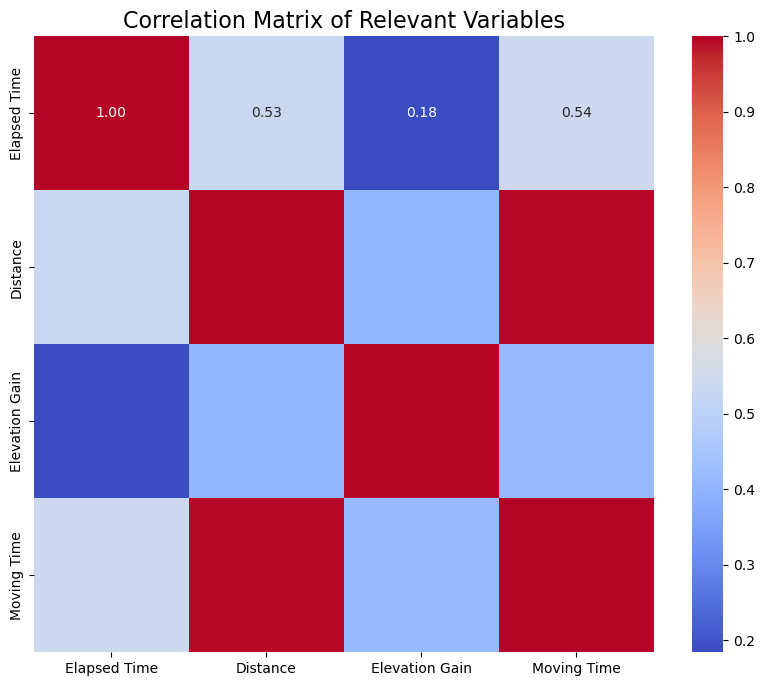

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
# Assuming the variable 'data' contains your DataFrame
# Replace 'data.csv' with the actual file path if loading from a CSV file
data = cleaned_running_data

# Select relevant variables
relevant_variables = ['Elapsed Time', 'Distance', 'Elevation Gain', 'Moving Time']

# Scatter plot for heart rate vs. elapsed time
plt.figure(figsize=(10, 6))
plt.scatter(data['Elapsed Time'], data['Moving Time'], alpha=0.5)
plt.title('Moving Time vs. Elapsed Time', fontsize=16)
plt.xlabel('Elapsed Time (seconds)', fontsize=12)
plt.ylabel('Moving Time', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot for heart rate vs. distance
plt.figure(figsize=(10, 6))
plt.scatter(data['Distance'], data['Moving Time'], alpha=0.5)
plt.title('Moving Time vs. Distance', fontsize=16)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Moving Time', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot for heart rate vs. elevation gain
plt.figure(figsize=(10, 6))
plt.scatter(data['Elevation Gain'], data['Moving Time'], alpha=0.5)
plt.title('Moving Time vs. Elevation Gain', fontsize=16)
plt.xlabel('Elevation Gain', fontsize=12)
plt.ylabel('Moving Time', fontsize=12)
plt.grid(True)
plt.show()

# Correlation matrix and heatmap
correlation_matrix = data[relevant_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Variables', fontsize=16)
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select features (independent variables) and target (dependent variable)
# Example: Using 'Distance' and 'Max Heart Rate' as features to predict 'Elapsed Time'
X = data[['Distance', 'Elapsed Time', 'Max Heart Rate', 'Max Speed', 'Elevation Gain']]
y = data['Moving Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Example: Predicting elapsed time for a new sample
# Replace the values with the features of the new sample
# new_sample = [[10.0, 160.0]]  # Example: Distance = 10 km, Max Heart Rate = 160 bpm
# predicted_time = model.predict(new_sample)
# print("Predicted Elapsed Time for the New Sample:", predicted_time)


Mean Squared Error: 49610.72188345593
R-squared Score: 0.990852446186745


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Select features (independent variables) and target (dependent variable)
# Example: Using 'Distance' and 'Max Heart Rate' as features to predict 'Elapsed Time'
X = data[['Distance', 'Elapsed Time', 'Max Heart Rate', 'Max Speed', 'Elevation Gain']]
y = data['Moving Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Example: Predicting elapsed time for a new sample
# Replace the values with the features of the new sample
# new_sample = [[10.0, 160.0]]  # Example: Distance = 10 km, Max Heart Rate = 160 bpm
# predicted_time = model.predict(new_sample)
# print("Predicted Elapsed Time for the New Sample:", predicted_time)

Mean Squared Error: 97482.33856421054
R-squared Score: 0.9820255601207964


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Select features (independent variables) and target (dependent variable)
# Example: Using 'Distance' and 'Max Heart Rate' as features to predict 'Elapsed Time'
X = data[['Distance', 'Elapsed Time', 'Max Heart Rate', 'Max Speed', 'Elevation Gain']]
y = data['Moving Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Support Vector Machine regressor model
model = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Example: Predicting elapsed time for a new sample
# Replace the values with the features of the new sample
# new_sample = [[10.0, 160.0]]  # Example: Distance = 10 km, Max Heart Rate = 160 bpm
# predicted_time = model.predict(new_sample)
# print("Predicted Elapsed Time for the New Sample:", predicted_time)


Mean Squared Error: 6200333.132121448
R-squared Score: -0.1432585302715288
